## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Lisandro Robles

***
## Estimación espectral


<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

In [36]:
#####################################################
# Paquetes necesarios para realizar el ejercicio #1 #
#####################################################

#Paquetes estándar

#Paquete numérico
import numpy as np
#Paquete gráfico
import matplotlib.pyplot as plt
#Paquete de manejo de datos
from pandas import DataFrame
#Paquete para mostrar el dataframe
from IPython.display import HTML

#Paquete propios

#Paquete que implementa la clase generador de señales
import pdsmodulos.signal_generator as gen
#Paquete que implementa la clase analizador de espectro y los metodos de estimacion espectral
import pdsmodulos.spectrum_analyzer as sa


Para verificar las propiedades del estimador periodograma se propone el siguiente experimento. Se genera una cantidad fija de realizaciones $S$ de $N$ muestras de ruido blanco gaussiano de varianza $\sigma^{2}$. Se observa a que valores convergen el sesgo y la varianza del estimador periodograma al aumentar la cantidad de muestras.

In [37]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = np.array([10,50,100,200,300,400,500,600,700,800,900,1000], dtype = int)

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 500

In [44]:
#Aca se almacenaran los resultados
tus_resultados = []
sesgos = np.zeros([np.size(N),],dtype = float)
varianzas = np.zeros([np.size(N),],dtype = float)

#Contador
j = 0

#Para cada largo de señal
for Ni in N:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,Ni)

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
    s = np.sqrt(4)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Estimador periodograma
    (f,Sxm,Sxv) = sa.periodograma(x,fs)

    #Calculo el area de ese espectro "promedio"
    #El area de la psd da la potencia
    valor_esperado = (np.mean(Sxm))
    sesgo = valor_esperado - np.power(s[0,0],2)

    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (np.mean(Sxv))

    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(sesgo),str(varianza)])

    #Sesgos
    sesgos[j] = sesgo

    #Varianzas
    varianzas[j] = varianza

    #Aumento el contador
    j = j + 1

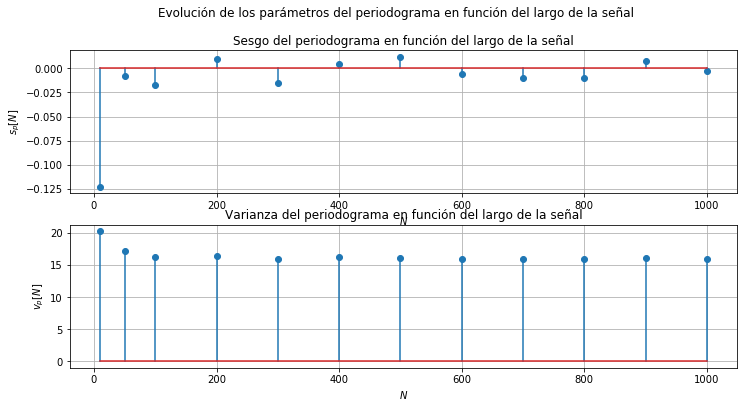

In [45]:
#######################################
# Presentación gráfica de resultados  #
#######################################

plt.figure()
fig, axarr = plt.subplots(2, 1,figsize = (10,5)) 
fig.suptitle('Evolución de los parámetros del periodograma en función del largo de la señal',fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].stem(N,sesgos)
axarr[0].set_title('Sesgo del periodograma en función del largo de la señal')
axarr[0].set_ylabel('$s_{p}[N]$')
axarr[0].set_xlabel('$N$')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].stem(N,varianzas)
axarr[1].set_title('Varianza del periodograma en función del largo de la señal')
axarr[1].set_ylabel('$v_{p}[N]$')
axarr[1].set_xlabel('$N$')
axarr[1].axis('tight')
axarr[1].grid()

In [46]:
########################################
# Presentación analítica de resultados #
########################################

df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],index=N)

HTML(df.to_html())


,$s_P$,$v_P$
10,-0.122705854776,20.2209512259
50,-0.00777775518299,17.2575103385
100,-0.0172154053925,16.2138833698
200,0.00960594305022,16.428608485
300,-0.0155111732422,15.9067430699
400,0.00480401589609,16.3228059544
500,0.0117754057702,16.0885249025
600,-0.00623970197946,15.9223770646
700,-0.00990511370671,15.8872733753
800,-0.00962141730078,15.9913930314


Del análisis de los resultados se ve que el periodograma es asintoticamente insesgado:

\begin{equation}
\lim_{N\to\infty} s_{p} = 0 
\end{equation}

Por otra parte, se ve que al aumentar la cantidad de muestras la varianza del periodograma no tiende a cero:

\begin{equation}
\lim_{N\to\infty} v_{p} = \sigma^{4} 
\end{equation}

De estas dos propiedades se puede concluir que el periodograma es un estimador incosistente de la potencia de señal $\sigma^{2}$.


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

En este experimento se genera una cantidad fija de realizaciones $S$ de $N$ muestras de ruido blanco gaussiano de varianza $\sigma^{2}$. Se observa a que valores convergen el sesgo y la varianza del estimador de Bartlett (a K constante) al aumentar la cantidad de muestras.

In [47]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = np.array([100,200,300,400,500,600,700,800,900,1000], dtype = int)

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 500

#Cantidad de bloques en los que se dividira cada realizacion
ki = 4

In [48]:
    #Aca se almacenaran los resultados
    tus_resultados = []
    sesgos = np.zeros([np.size(N),],dtype = float)
    varianzas = np.zeros([np.size(N),],dtype = float)
    
    #Contador
    j = 0
    
    #Para cada largo de señal
    for Ni in N:
                
        #Enciendo el generador de funciones
        generador = gen.signal_generator(fs,Ni)
                
        #Lista en que alamacenre las distribuciones para cada realizacion
        dist = []
        
        #Distribucion elegida para cada realizacion (todas normales)
        for i in range(0,S):
            dist.append("normal")
        
        #Media - Todas las realizaciones de media 0
        u = np.zeros((S,1),dtype = float)
        
        #Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
        s = np.sqrt(4)*np.ones((S,1),dtype = float)
        
        #Llamo al metodo que genera ruido blanco
        #Genera una matriz de NxS, donde N = Filas y S = Columnas
        (t,x) = generador.noise(dist,u,s)
            
        #Estimador periodograma
        (f,Sxm,Sxv) = sa.bartlett(x,fs,k = ki,window = 'bartlett')
        
        #Calculo el area de ese espectro "promedio"
        #El area de la psd da la potencia
        valor_esperado = (np.mean(Sxm))
        sesgo = valor_esperado - np.power(s[0,0],2)

        
        #Calculo el area de eso
        #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
        varianza = (np.mean(Sxv))
                
        #Almaceno los resultados para esta largo de señal
        tus_resultados.append([str(sesgo),str(varianza)])
        
        #Sesgos
        sesgos[j] = sesgo
        
        #Varianzas
        varianzas[j] = varianza
        
        #Aumento el contador
        j = j + 1

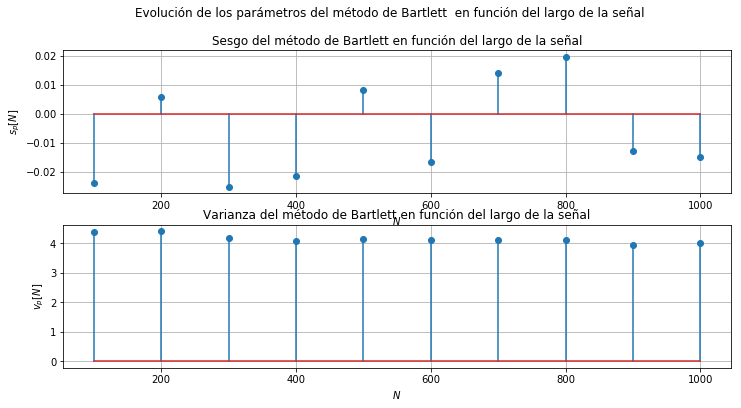

In [51]:
#Presentación gráfica de resultados
plt.figure()
fig, axarr = plt.subplots(2, 1,figsize = (10,5)) 
fig.suptitle('Evolución de los parámetros del método de Bartlett  en función del largo de la señal',fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].stem(N,sesgos)
axarr[0].set_title('Sesgo del método de Bartlett en función del largo de la señal')
axarr[0].set_ylabel('$s_{p}[N]$')
axarr[0].set_xlabel('$N$')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].stem(N,varianzas)
axarr[1].set_title('Varianza del método de Bartlett en función del largo de la señal')
axarr[1].set_ylabel('$v_{p}[N]$')
axarr[1].set_xlabel('$N$')
axarr[1].axis('tight')
axarr[1].grid()

In [52]:

#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],index=N)
HTML(df.to_html())


,$s_P$,$v_P$
100,-0.0239737890082,4.37018970722
200,0.00583999825645,4.39621578882
300,-0.0251893244052,4.18024155654
400,-0.0214532684085,4.07348848974
500,0.00795274808381,4.14069199289
600,-0.0167487847878,4.10380653559
700,0.0140087284976,4.10457005723
800,0.0195230007455,4.12015391744
900,-0.0129276999184,3.95338198656
1000,-0.0147885879783,4.00855650245


Del análisis de los resultados se ve que el estimador de Bartlett es asintoticamente insesgado:

\begin{equation}
\lim_{N\to\infty} s_{p} = 0 
\end{equation}

Por otra parte, se ve que al aumentar la cantidad de muestras y dividiendo cada realización en $K$ bloques (dejando $K$ constante), la varianza no tiende a cero. Pero es $K$ veces más pequeña que la del periodograma para un mismo $N$:

\begin{equation}
\lim_{N\to\infty} v_{p} = \frac{1}{K}\sigma^{4} 
\end{equation}

De estas dos propiedades se puede concluir que Bartlett es un estimador incosistente de la potencia de señal $\sigma^{2}$ a medida que aumenta $N$.


En el siguiente experimento se genera una cantidad fija de realizaciones $S$ de $N$ muestras de ruido blanco gaussiano de varianza $\sigma^{2}$. Se observa como varían la varianza y la resolución espectral a medida que se aumenta la cantidad de bloques $K$ en los que se divide cada realización.

In [53]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#Cantidad de bloques en los que se dividira cada realizacion
k = np.linspace(1,20,20,dtype = int)

In [54]:
#Aca se almacenaran los resultados
tus_resultados = []
resoluciones = np.zeros([np.size(k),],dtype = float)
varianzas = np.zeros([np.size(k),],dtype = float)

#Contador
j = 0

#Para cada largo de señal
for ki in k:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
    s = np.sqrt(4)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Estimador periodograma
    (f,Sxm,Sxv) = sa.bartlett(x,fs,k = ki,window = 'bartlett')
    
    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (np.mean(Sxv))

    #Resolucion
    resolucion = f[1] - f[0]
    
    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(varianza),str(resolucion)])
    
    #Varianzas
    varianzas[j] = varianza

    #Resoluciones
    resoluciones[j] = resolucion
    
    #Aumento el contador
    j = j + 1

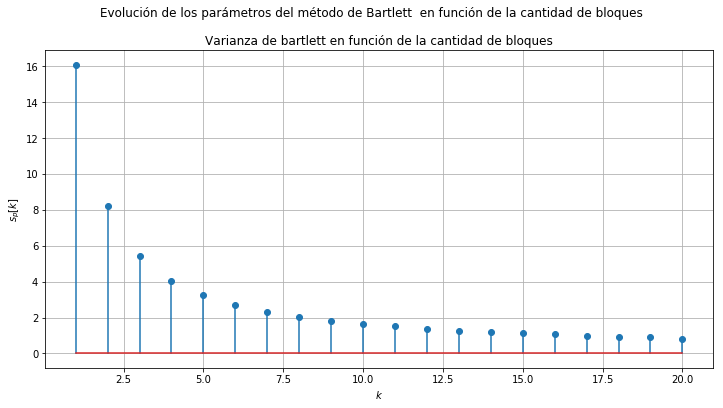

In [55]:
#Presentación gráfica de resultados
plt.figure()
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Evolución de los parámetros del método de Bartlett  en función de la cantidad de bloques',fontsize=12,y = 1.08)
fig.tight_layout()

axarr.stem(k,varianzas)
axarr.set_title('Varianza de bartlett en función de la cantidad de bloques')
axarr.set_ylabel('$s_{p}[k]$')
axarr.set_xlabel('$k$')
axarr.axis('tight')
axarr.grid()

In [56]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_P$', '$\Delta_{\Omega}$'],index=k)
HTML(df.to_html())

,$s_P$,$\Delta_{\Omega}$
1,16.0888920332,[ 0.00628319]
2,8.20501904804,[ 0.01256637]
3,5.40810304118,[ 0.01886842]
4,4.0333281253,[ 0.02513274]
5,3.2620464313,[ 0.03141593]
6,2.68476778918,[ 0.03785051]
7,2.29489197586,[ 0.04424778]
8,2.02170343253,[ 0.05026548]
9,1.82399388405,[ 0.05660527]
10,1.63753297735,[ 0.06283185]


Del análisis de los resultados se ve que la varianza del estimador de Bartlett tiende a cero a medida que se incrementa la cantidad de bloques $K$ (a $N$ constante):

\begin{equation}
\lim_{K\to\infty} v_{p} = \lim_{K\to\infty} \frac{1}{K}\sigma^{4} = 0 
\end{equation}

Por otra parte, se ve que también se ve reducida la resolución espectral al aumentar la cantidad de bloques que se promedian:

\begin{equation}
\Delta{f} = K\frac{f_{s}}{N} 
\end{equation}

De estas dos propiedades se puede concluir que Bartlett es un estimador consistente de la potencia de señal $\sigma^{2}$ a medida que aumenta $K$. También se observa que hay una relación de compromiso entre estimar lo mejor posible la potencia de la señal ($\sigma^{2}$) y la detección de variaciones abruptas (producto del aumento de $\Delta_{f}$).

<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

En este experimento se genera una cantidad fija de realizaciones $S$ de $N$ muestras de ruido blanco gaussiano de varianza $\sigma^{2}$. Se observa a que valores convergen el sesgo y la varianza del estimador de Welch (con un solapamiento del $50 %$ y con una ventaneando con una ventana triangular) al aumentar la cantidad de muestras. Se divide en la misma cantidad de bloques $K$ y muestras $N$ para poder comparar con el método de Bartlett.

In [57]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = np.array([100,200,300,400,500,600,700,800,900,1000], dtype = int)

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 500

#Cantidad de bloques en los que se dividira cada realizacion
ki = 4

#Overlap (50%)
solapamiento = 50

In [58]:
#Aca se almacenaran los resultados
tus_resultados = []
sesgos = np.zeros([np.size(N),],dtype = float)
varianzas = np.zeros([np.size(N),],dtype = float)
    
#Contador
j = 0

#Para cada largo de señal
for Ni in N:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,Ni)

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza - Todas las realizaciones de desvio estandar de raiz de 2
    s = np.sqrt(4)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Realizo de forma matricial el modulo del espectro de todas las realizaciones
    (f,Sxm,Sxv) = sa.welch(x,fs,k = ki,window = 'bartlett',overlap = solapamiento)

    #Calculo el area de ese espectro "promedio"
    #El area de la psd da la potencia
    valor_esperado = (np.mean(Sxm))
    sesgo = valor_esperado - np.power(s[0,0],2)


    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (np.mean(Sxv))
    
    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(sesgo),str(varianza)])

    #Sesgos
    sesgos[j] = sesgo

    #Varianzas
    varianzas[j] = varianza

    #Aumento el contador
    j = j + 1

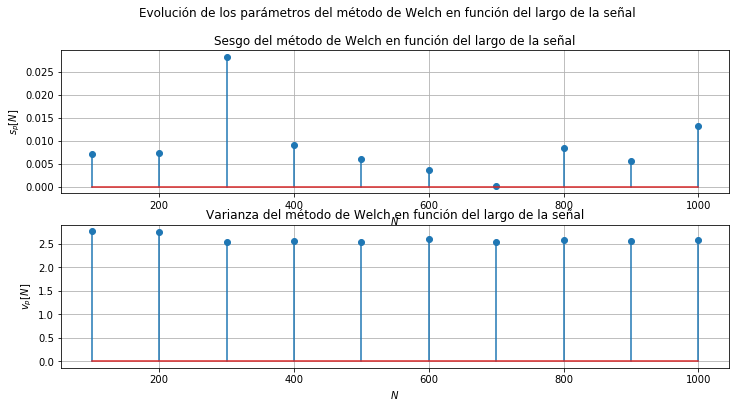

In [59]:
#Presentación gráfica de resultados
plt.figure()
fig, axarr = plt.subplots(2, 1,figsize = (10,5)) 
fig.suptitle('Evolución de los parámetros del método de Welch en función del largo de la señal',fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].stem(N,np.abs(sesgos))
axarr[0].set_title('Sesgo del método de Welch en función del largo de la señal')
axarr[0].set_ylabel('$s_{p}[N]$')
axarr[0].set_xlabel('$N$')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].stem(N,varianzas)
axarr[1].set_title('Varianza del método de Welch en función del largo de la señal')
axarr[1].set_ylabel('$v_{p}[N]$')
axarr[1].set_xlabel('$N$')
axarr[1].axis('tight')
axarr[1].grid()

In [60]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],index=N)
HTML(df.to_html())


,$s_P$,$v_P$
100,0.00717146743104,2.76574437505
200,0.00732662092943,2.76088775746
300,-0.0282543300731,2.54815156852
400,-0.00907528521649,2.57265994472
500,-0.00593836108851,2.54469974499
600,-0.00371030426955,2.59544462067
700,0.000246339436331,2.54436804744
800,0.00852445279146,2.58072650455
900,-0.005498375666,2.56576600257
1000,0.0131169514077,2.57564901581


Del análisis de los resultados se ve que el estimador de Welch es asintoticamente insesgado:

\begin{equation}
\lim_{N\to\infty} s_{p} = 0 
\end{equation}

Por otra parte, se ve que al aumentar la cantidad de muestras y dividiendo cada realización en $K$ bloques (con un solapamiento entre bloques del $50%$), la varianza no tiende a cero. Pero es (aproximadamente) $1.6$ veces mas chica que el metodo de bartlett para un mismo K y un mismo N:

\begin{equation}
\lim_{N\to\infty} v_{p} = \frac{5}{8}\frac{1}{K}\sigma^{4} 
\end{equation}

En este aspecto se ve una inconsistencia ya que la teoría dice que el factor de reducción debería ser de $\frac{9}{16}$. Se puede explicar esta inconsistencia debido al tipo de ventana utilizada: Como cada segmento es ventaneado, el peso de los puntos cerca de los márgenes del segmento será menor a los del centro segmento (ya que las ventanas tienden a cero en los bordes). Como por lo general se utiliza un solapamiento del $50%$, los puntos atenuados en un segmento estaran en el centro del próximo segmento, por lo que todos los puntos estarán igualmente representados. Usar una ventana que tenga un mayor roll-off seguramente reducira la varianza.

De estas dos propiedades se puede concluir que Welch es un estimador incosistente de la potencia de señal $\sigma^{2}$ a medida que aumenta $N$.

En el siguiente experimento se genera una cantidad fija de realizaciones $S$ de $N$ muestras de ruido blanco gaussiano de varianza $\sigma^{2}$. Se observa como varían la varianza y la resolución espectral a medida que se aumenta la cantidad de bloques $K$ en los que se divide cada realización.

In [61]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#Cantidad de bloques en los que se dividira cada realizacion
k = np.linspace(2,20,19,dtype = int)

In [62]:
#Aca se almacenaran los resultados
tus_resultados = []
resoluciones = np.zeros([np.size(k),],dtype = float)
varianzas = np.zeros([np.size(k),],dtype = float)

#Contador
j = 0

#Para cada largo de señal
for ki in k:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
    s = np.sqrt(4)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Estimador periodograma
    (f,Sxm,Sxv) = sa.welch(x,fs,k = ki,window = 'bartlett',overlap = solapamiento)
    
    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (np.mean(Sxv))

    #Resolucion
    resolucion = f[1] - f[0]
    
    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(varianza),str(resolucion)])
    
    #Varianzas
    varianzas[j] = varianza

    #Resoluciones
    resoluciones[j] = resolucion
    
    #Aumento el contador
    j = j + 1

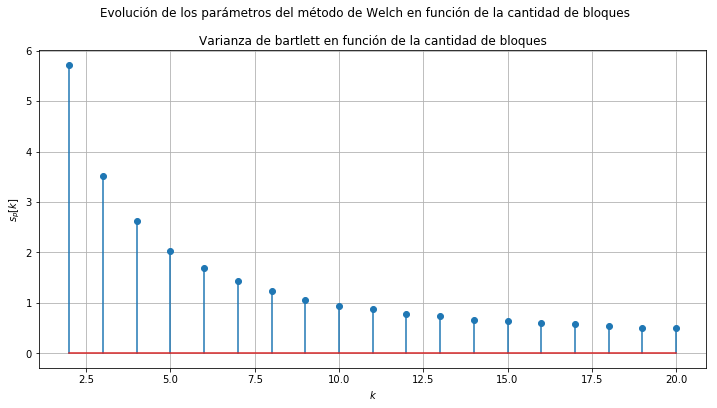

In [63]:
#Presentación gráfica de resultados
plt.figure()
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Evolución de los parámetros del método de Welch en función de la cantidad de bloques',fontsize=12,y = 1.08)
fig.tight_layout()

axarr.stem(k,varianzas)
axarr.set_title('Varianza de bartlett en función de la cantidad de bloques')
axarr.set_ylabel('$s_{p}[k]$')
axarr.set_xlabel('$k$')
axarr.axis('tight')
axarr.grid()

In [64]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_P$', '$\Delta_{\Omega}$'],index=k)
HTML(df.to_html())

,$s_P$,$\Delta_{\Omega}$
2,5.71833474367,[ 0.01256637]
3,3.51124566311,[ 0.01886842]
4,2.62474420905,[ 0.02513274]
5,2.03651079878,[ 0.03141593]
6,1.68696682222,[ 0.03785051]
7,1.44366705725,[ 0.04424778]
8,1.23812758052,[ 0.05026548]
9,1.0613741606,[ 0.05660527]
10,0.932433516943,[ 0.06283185]
11,0.873518420759,[ 0.06981317]


Del análisis de los resultados se ve que la varianza del estimador de Bartlett tiende a cero a medida que se incrementa la cantidad de bloques $K$ (a $N$ constante):

\begin{equation}
\lim_{K\to\infty} v_{p} = \lim_{K\to\infty} \frac{9}{16}\frac{1}{K}\sigma^{4} = 0 
\end{equation}

Por otra parte, se ve que también se ve reducida la resolución espectral al aumentar la cantidad de bloques que se promedian, en el caso de ventanear con una ventana de Bartlett:

\begin{equation}
\Delta{f} = K\frac{f_{s}}{N} 
\end{equation}

De estas dos propiedades se puede concluir que Welcht es un estimador consistente de la potencia de señal $\sigma^{2}$ a medida que aumenta $K$.

<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

Primero se realiza el experimento utilizando el Método de Welch con solapamiento del $50%$ y con $K = 4$ y se estudia como varian los parámetros del estimador en función de la $SNR$. En el experimento se aplica el estimador al resultado de aplicar el método a cada realización, de donde se obtiene la estimación de frecuencia para cada realización. A partir de ese vector se obtiene el valor esperado y la varianza. Tanto los valores de sesgo y varianza estan normalizados respecto a la resolución espectral.

In [65]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#SNRs para las que se realizara la simulacion
SNR = np.array([ 3, 10, 15, 20], dtype=np.float)

In [70]:
tus_resultados = []
var_w = []

for SNRi in SNR:
    
    #Parametros de la señal x1
    a1 = np.sqrt(2)
    A1 = a1*np.ones((S,1),dtype = float)
    p1 = 0
    P1 = p1*np.ones((S,1),dtype = float)
    fo = np.pi/2

    #Limites de la distribucion uniforme de fr
    linf = -0.5*((2*np.pi)/N)
    lsup = 0.5*((2*np.pi)/N)
    
    #Fr sera una variable aleatoria de distribucion uniforme entre -1/2 y 1/2
    #Genero 200 realizaciones de fr
    fr = np.random.uniform(linf,lsup,S).reshape(S,1)
    
    #Genero 200 realizaciones de f1
    F1 = fo + fr
    
    #Parametros del ruido(distribucion normal)
        
    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []
    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")    
    #Media - Todas las realizaciones de media 0
    u = 0
    U = u*np.ones((S,1),dtype = float)
    #Varianza - Se setea en funcion de snr,que indica cuantos db por debajo
    #quiero que este de x1
    var = (N/2)*(np.power(a1,2)/2)*(np.power(10,-(SNRi/10)))
    SD = np.sqrt(var)*np.ones((S,1),dtype = float)
    
    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)
    
    #Genero S realizaciones de x
    (t,x1) = generador.sinewave(A1,F1,P1,freq = 'normalized_frequency')
    
    #Genero S realizaciones de n
    (t,n) = generador.noise(dist,U,SD)
    
    #Genero S realizaciones de x = x1 + n
    x = x1 + n
        
    #Obtengo la psd para cada una de las realizaciones
    #Seteo el parametro ensemble para que me devuelva todas las realizaciones en Sxm
    (f,Sxm,Sxv) = sa.welch(x,fs,k = 4,window = 'bartlett',overlap = 50,ensemble = True)
    
    #Aplico el estimador de frecuencia central
    #Calculo el sesgo
    df = f[1] - f[0]
    fo_welch = df*(np.argmax(Sxm,axis = 0))
    fo_welch_valor_esperado = np.mean(fo_welch)
    sesgo_fo_welch = (fo_welch_valor_esperado - fo)
    varianza_fo_welch = np.var(fo_welch)
        
    #Se almacenan los parametros en resultados
    var_w.append(varianza_fo_welch)
    tus_resultados.append([str(sesgo_fo_welch),str(varianza_fo_welch)])

In [71]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_{\hat{\Omega}_1^W}$', '$v_{\hat{\Omega}_1^W}$'],index=SNR)
HTML(df.to_html())

,$s_{\hat{\Omega}_1^W}$,$v_{\hat{\Omega}_1^W}$
3.0,0.0152053084434,0.872406057869
10.0,0.0973893722613,0.482883817985
15.0,-0.00213628300444,0.00316634279691
20.0,0.000628318530718,0.000157518886241


Se observa que el estimador presenta un mayor rendimiento de sesgo y varianza cuando la $SNR$ es mayor, lo cual es esperable ya que la componente senoidal se destaca más por encima del piso de ruido.

A continuacion se estudia como varian los parámetros del estimador para una SNR fija en $3 dB$ a medida que se varia la cantidad de bloques que se promedian.

In [72]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#SNRs para las que se realizara la simulacion
SNR = 3

#Cantidad de bloques en los que se dividira cada realizacion
k = np.linspace(5,200,10,dtype = int)

In [75]:
tus_resultados = []

for ki in k:
    
    #Parametros de la señal x1
    a1 = np.sqrt(2)
    A1 = a1*np.ones((S,1),dtype = float)
    p1 = 0
    P1 = p1*np.ones((S,1),dtype = float)
    fo = np.pi/2

    #Limites de la distribucion uniforme de fr
    linf = -0.5*((2*np.pi)/N)
    lsup = 0.5*((2*np.pi)/N)
    
    #Fr sera una variable aleatoria de distribucion uniforme entre -1/2 y 1/2
    #Genero 200 realizaciones de fr
    fr = np.random.uniform(linf,lsup,S).reshape(S,1)
    
    #Genero 200 realizaciones de f1
    F1 = fo + fr
    
    #Parametros del ruido(distribucion normal)
        
    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []
    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")    
    #Media - Todas las realizaciones de media 0
    u = 0
    U = u*np.ones((S,1),dtype = float)
    #Varianza - Se setea en funcion de snr,que indica cuantos db por debajo
    #quiero que este de x1
    var = (N/2)*(np.power(a1,2)/2)*(np.power(10,-(SNR/10)))
    #var = np.power(10,(-snr/10))
    SD = np.sqrt(var)*np.ones((S,1),dtype = float)
    
    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)
    
    #Genero S realizaciones de x
    (t,x1) = generador.sinewave(A1,F1,P1,freq = 'normalized_frequency')
    
    #Genero S realizaciones de n
    (t,n) = generador.noise(dist,U,SD)
    
    #Genero S realizaciones de x = x1 + n
    x = x1 + n
        
    #Obtengo la psd para cada una de las realizaciones
    #Seteo el parametro ensemble para que me devuelva todas las realizaciones en Sxm
    (f,Sxm,Sxv) = sa.welch(x,fs,k = ki,window = 'bartlett',overlap = 50,ensemble = True)
    
    #Aplico el estimador de frecuencia central
    #Calculo el sesgo
    df = f[1] - f[0]
    fo_estimador = df*(np.argmax(Sxm,axis = 0))
    fo_valor_esperado = np.mean(fo_estimador)
    sesgo_fo = (fo_valor_esperado - fo)
    varianza_fo = np.var(fo_estimador)
        
    #Se almacenan los parametros en resultados
    tus_resultados.append([str(sesgo_fo),str(varianza_fo)])

In [76]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_{\hat{\Omega}_1^W}$', '$v_{\hat{\Omega}_1^W}$'],index=k)
HTML(df.to_html())

,$s_{\hat{\Omega}_1^W}$,$v_{\hat{\Omega}_1^W}$
5,-0.0783827367071,0.905625005566
26,-0.115742887238,1.03890572643
48,-0.00471238898038,1.18581076218
70,-0.0269279370308,1.2077978741
91,0.00628318530718,1.25142635964
113,0.113882733693,1.51373515376
135,-0.255815401792,1.14308146809
156,-0.151843644924,1.59994512012
178,-0.232477856366,1.31190729541
200,-0.213628300444,1.25320288843


De analizar los resultados se observa que promediar mas bloques reduce la varianza en general. Lo interesante es ver que en un principio el sesgo tiende a reducirse y luego vuelve a incrementarse. Esto se debe a que si bien al promediar el piso de ruido se vuelve mas plano (permitiendo distinguir mejor a la componente senoidal), llega un punto en que se promedia varios bloques se pierde la capacidad de distinguir las variaciones abruptas, lo que reduce la amplitud de la componente senoidal aumentando la $SNR$ que se ve en el espectro.

   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se ha elegido el método de Blackman-Tuckey. Este metodo se basa en multiplicar a la secuencia de autocorrelacion de la señal por una ventana de forma de mejorar la estimacion de la secuencia de autocorrelacion.
</div>

In [77]:
import spectrum as sp

Se realiza el experimento utilizando el Método de Blackman-Tuckey y se estudia como varian los parámetros del estimador en función de la $SNR$. En el experimento se aplica el estimador al resultado de aplicar el método a cada realización, de donde se obtiene la estimación de frecuencia para cada realización. A partir de ese vector se obtiene el valor esperado y la varianza. Tanto los valores de sesgo y varianza estan normalizados respecto a la resolución espectral.

In [80]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#SNRs para las que se realizara la simulacion
SNR = np.array([ 3, 10, 15, 20], dtype=np.float)

In [89]:
tus_resultados = []
var_b = []

for SNRi in SNR:
    
    #Parametros de la señal x1
    a1 = np.sqrt(2)
    A1 = a1*np.ones((S,1),dtype = float)
    p1 = 0
    P1 = p1*np.ones((S,1),dtype = float)
    fo = np.pi/2

    #Limites de la distribucion uniforme de fr
    linf = -0.5*((2*np.pi)/N)
    lsup = 0.5*((2*np.pi)/N)
    
    #Fr sera una variable aleatoria de distribucion uniforme entre -1/2 y 1/2
    #Genero 200 realizaciones de fr
    fr = np.random.uniform(linf,lsup,S).reshape(S,1)
    
    #Genero 200 realizaciones de f1
    F1 = fo + fr
    
    #Parametros del ruido(distribucion normal)
        
    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []
    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")    
    #Media - Todas las realizaciones de media 0
    u = 0
    U = u*np.ones((S,1),dtype = float)
    #Varianza - Se setea en funcion de snr,que indica cuantos db por debajo
    #quiero que este de x1
    var = (N/2)*(np.power(a1,2)/2)*(np.power(10,-((SNRi + 10)/10)))
    #var = np.power(10,(-snr/10))
    SD = np.sqrt(var)*np.ones((S,1),dtype = float)
    
    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)
    
    #Genero S realizaciones de x
    (t,x1) = generador.sinewave(A1,F1,P1,freq = 'normalized_frequency')
    
    #Genero S realizaciones de n
    (t,n) = generador.noise(dist,U,SD)
    
    #Genero S realizaciones de x = x1 + n
    x = x1 + n
    
    fo_blackman = np.zeros((S,),dtype = float)
    
    #Se aplica el correlograma a cada realizacion (la funcion no acepta una matriz)
    for i in range(0,S):
        p = sp.pcorrelogram(x[:,i], lag=100, NFFT=N, scale_by_freq=True,sampling = (2*np.pi))
        psd = p.psd
        df = p.df
        Sxx = 10*np.log10(np.abs(psd/np.max(psd)))
        fo_blackman[i] = p.df*(np.argmax(Sxx))
        
    fo_valor_esperado_blackman = np.mean(fo_blackman)
    sesgo_fo_blackman = (fo_valor_esperado_blackman - fo)
    varianza_fo_blackman = np.var(fo_blackman)
        
    #Se almacenan los parametros en resultados
    var_b.append(varianza_fo_blackman)
    tus_resultados.append([str(sesgo_fo_blackman),str(varianza_fo_blackman)])

In [90]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_{\hat{\Omega}_1^B}$', '$v_{\hat{\Omega}_1^B}$'],index=SNR)
HTML(df.to_html())

,$s_{\hat{\Omega}_1^B}$,$v_{\hat{\Omega}_1^B}$
3.0,-0.00295309709437,0.0446832166507
10.0,-0.000125663706143,3.14248204131e-06
15.0,3.14159265362e-05,2.1703260078e-06
20.0,-0.000125663706143,7.73776985045e-07


   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Un indicador apropiado seria la varianza de l estimador.
</div>

In [91]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = []

for var_wi,var_bi in zip(var_w,var_b):
    tus_resultados.append([str(var_wi),str(var_bi)])

df = DataFrame(tus_resultados, columns=['$i_W$', '$i_B$'],index=SNR)
HTML(df.to_html())


,$i_W$,$i_B$
3.0,0.872406057869,0.0446832166507
10.0,0.482883817985,3.14248204131e-06
15.0,0.00316634279691,2.1703260078e-06
20.0,0.000157518886241,7.73776985045e-07


Se observa que el metodo de Blackman-Tuckey tiene menor varianza a la hora de estimar la frecuencia de una senoidal con ruido incorrelado.